
# TAREA 1 — Discrete Time Signal Operations

**Fecha:** 2026-02-16  
**Tema (clase de hoy):** Operaciones en señales en tiempo discreto (DT)

> Entrega: **un solo notebook** con tus soluciones y gráficas.



## Relación con **Serie 1 (ejercicios en papel)**

Esta tarea es la **extensión computacional** de la Serie 1.

**Flujo recomendado (por ejercicio):**
1) Resuelve **en papel** (análisis / fórmulas / razonamiento).
2) Implementa aquí para **verificar** con código y gráficas.
3) Si hay contradicción: **debug** hasta entender el error (en el papel o en el código).

### Mapeo rápido (Serie 1 → Notebook)

- **Serie 1 #4** (u[n], δ[n], r[n]) → **Notebook Ejercicio 1**
- **Serie 1 #2** (periodicidad de cos) → **Notebook Ejercicio 2**
- **Serie 1 #5–7** (inversión y corrimientos) → **Notebook Ejercicio 3**
- **Serie 1 #11** (media y RMS) → **Notebook Ejercicio 4**
- **Serie 1 #9** (energía de (0.9)^n u[n]) → **Notebook Ejercicio 5**
- **Serie 1 #12** (auto/cross correlación) → **Notebook Ejercicio 6**



## Reglas (importantes)

- Puedes usar ChatGPT (u otra IA) **solo como verificador**.
- Tu notebook debe incluir tu razonamiento (comentarios) y tu código.
- **No uses atajos** que oculten la idea:
  - `np.roll`, `np.flip`, `x[::-1]` (para inversión), `np.convolve`, `np.correlate`
- Sí puedes usar NumPy básico, `for` loops, y operaciones elementales.

**Pista:** Si tu solución cabe en 1 línea usando una función “mágica”, probablemente no cuenta.


**Clave:** La IA NO sustituye el papel. Úsala para *verificar* y para detectar errores, igual que usarías una calculadora.



## 1) Datos del estudiante

Completa esta celda y vuelve a correrla.


In [ ]:

# === Datos del estudiante ===
NOMBRE = "Rafael Gonzalez Arredondo y Axel Uriel Jimenez Gutierrez"
GRUPO = "4"

print("Nombre:", NOMBRE)
print("Grupo:", GRUPO)


Nombre: Rafael Gonzalez Arredondo y Axel Uriel Jimenez Gutierrez
Grupo: 4



## 2) Imports y configuración (no modificar)

Esta sección es scaffolding para que no pierdas tiempo con formato de gráficas.


In [6]:

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (7, 3)
plt.rcParams["axes.grid"] = True
np.set_printoptions(precision=4, suppress=True)



## 3) (Opcional) Subir foto de tu libreta / sketch

Si dibujas a mano alguna señal, puedes subirla aquí como evidencia.


In [7]:

# (Opcional) En Colab:
# from google.colab import files
# uploaded = files.upload()

# (Opcional) Mostrar una imagen subida (si aplica):
# from PIL import Image
# import io
# fname = list(uploaded.keys())[0]
# img = Image.open(io.BytesIO(uploaded[fname]))
# plt.figure(figsize=(6,4))
# plt.imshow(img); plt.axis("off"); plt.title(fname)
# plt.show()



## 4) Funciones de graficación (scaffold)

Usa estas funciones para graficar de forma consistente.


In [8]:

def stem_plot(n, x, title="", xlabel="n", ylabel="x[n]"):
    """Discrete-time stem plot."""
    n = np.asarray(n)
    x = np.asarray(x)
    markerline, stemlines, baseline = plt.stem(n, x)
    #Le quite este parametro para que corriera , use_line_collection=True
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

def compare_stem(n, x1, x2, label1="x1", label2="x2", title=""):
    """Compare two discrete-time signals on the same axes."""
    n = np.asarray(n)
    x1 = np.asarray(x1); x2 = np.asarray(x2)
    plt.stem(n, x1, use_line_collection=True)
    plt.stem(n, x2, use_line_collection=True)
    plt.title(title)
    plt.xlabel("n")
    plt.ylabel("amplitud")
    plt.legend([label1, label2])
    plt.grid(True)
    plt.show()



## 5) Funciones que debes implementar (TODO)

Implementa **sin** usar atajos (`np.roll`, `np.flip`, slicing invertido, etc.).


In [18]:

def time_reverse(x):
    """Return x_rev[n] = x[-n] assuming x is indexed on n=0..N-1 (finite-length)."""
    # TODO: implement using loops / indexing
    # Convertimos a array de numpy por si acaso entra una lista
    x = np.asarray(x)

    # Obtenemos la longitud del arreglo
    N = len(x)

    # Creamos un arreglo vacío del mismo tamaño para llenar
    x_rev = np.zeros(N)

    # Recorremos el arreglo original usando un bucle
    for n in range(N):
        # El índice N-1-i nos da el elemento desde el final hacia atrás
        x_rev[n] = x[N - 1 - n]

    return x_rev

def time_shift(x, k, pad_value=0.0):
    """Return x_shift[n] = x[n-k]. Positive k shifts RIGHT (delay)."""
    # TODO: implement with explicit padding
    x = np.asarray(x)
    N = len(x)
    # Creamos el arreglo de salida lleno con el pad_value por defecto
    x_shift = np.full(N, pad_value)

    # Recorremos cada posición 'n' de nuestro nuevo arreglo
    for n in range(N):
        # El valor en x_shift[n] debe ser x[n - k]
        # Pero solo si (n - k) es un índice válido dentro del arreglo original
        indice_original = n - k

        if 0 <= indice_original < N:
            x_shift[indice_original] = x[n]

    return x_shift
#Creo que aqui seria al reves
def energy(x):
    """E = sum |x[n]|^2 for the available samples."""
    # TODO
    x = np.asarray(x)
    suma_energia = 0.0

    # Recorremos cada muestra de la señal
    for muestra in x:
        # Elevamos al cuadrado (el valor absoluto es implícito al elevar al cuadrado)
        # pero usamos abs() por si la señal tuviera números complejos
        suma_energia += abs(muestra)**2
        #Aqui la ia agrego lo del valor absoluto
    return suma_energia

def mean_value(x):
    """Mean over available samples."""
    # TODO
    x = np.asarray(x)
    N = len(x)

    # Si el arreglo está vacío, evitamos dividir por cero
    if N == 0:
        return 0.0

    suma_total = 0.0
    for muestra in x:
        suma_total += muestra

    return suma_total / N

def rms(x):
    """RMS over available samples."""
    # TODO
    x = np.asarray(x)
    N = len(x)

    if N == 0:
        return 0.0

    # 1. Calculamos la suma de los cuadrados (parecido a la energía)
    suma_cuadrados = 0.0
    for muestra in x:
        suma_cuadrados += abs(muestra)**2

    # 2. Dividimos entre N para obtener el promedio de los cuadrados (Mean Square)
    ms = suma_cuadrados / N

    # 3. Aplicamos la raíz cuadrada (Root)
    return np.sqrt(ms)

def autocorr(x):
    """Autocorrelation for lags k = -(N-1)..(N-1). Return (k_vals, rxx)."""
    # TODO (no np.correlate)
    return crosscorr(x, x)

def crosscorr(x, y):
    """Cross-correlation r_xy[k] for lags k = -(N-1)..(N-1). Return (k_vals, rxy)."""
    # TODO (no np.correlate)
    x = np.asarray(x)
    y = np.asarray(y)
    N = len(x)

    # Definimos el rango de desplazamientos (lags)
    k_vals = np.arange(-(N - 1), N)
    rxy = np.zeros(len(k_vals))

    # Recorremos cada desplazamiento k
    for i, k in enumerate(k_vals):
        suma_k = 0.0
        # Calculamos la suma de productos para el desplazamiento k
        for n in range(N):
            # El índice para y es (n - k)
            if 0 <= n - k < N:
                suma_k += x[n] * y[n - k]

        rxy[i] = suma_k

    return k_vals, rxy



## 6) Ejercicios

En cada ejercicio:
1) escribe tu razonamiento en comentarios,
2) implementa,
3) grafica y verifica visualmente.



### Ejercicio 1 — Señales básicas

Para **-5 ≤ n ≤ 5**, construye y grafica:
- a) u[n]
- b) δ[n]
- c) r[n] = n u[n]

**TODO:** crea `n`, `u`, `delta`, `r` y grafícalas con `stem_plot`.


📌 Conecta con **Serie 1 #4** (u[n], δ[n], r[n]).

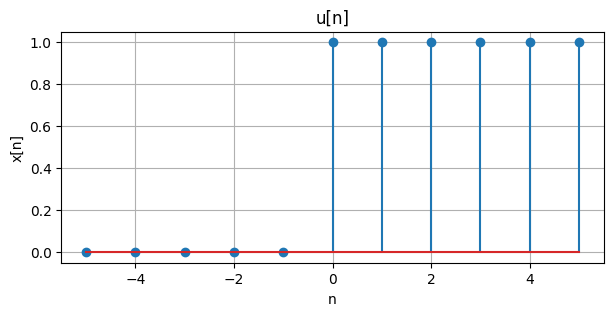

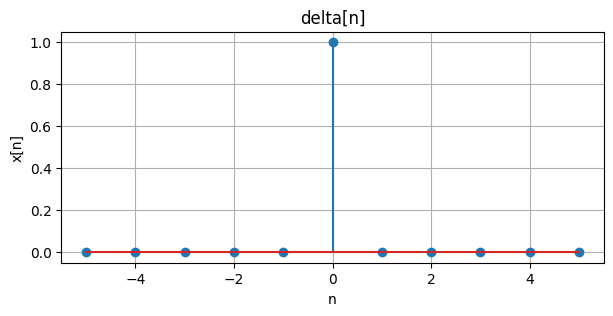

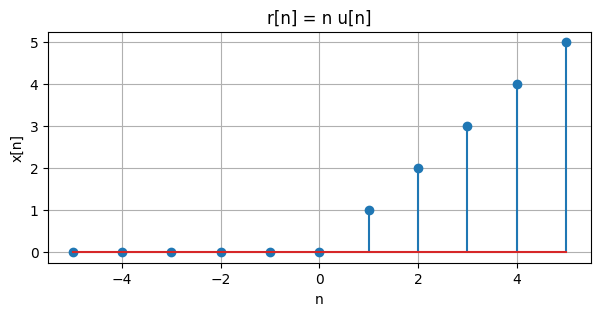

In [10]:
#Razonamiento: literalmente hice un escalon que valiera 1 y inpulso que valiera uno y multiplique el tiempo contra 1 para que me diera la rampa
# TODO
n = np.arange(-5, 6)

# u[n]
u = np.where(n >= 0, 1, 0) # TODO
# δ[n]
delta = np.where(n == 0, 1, 0) # TODO
# r[n] = n u[n]
r = n * u  # TODO

# Graficar
stem_plot(n, u, title="u[n]")
stem_plot(n, delta, title="delta[n]")
stem_plot(n, r, title="r[n] = n u[n]")



### Ejercicio 2 — Periodicidad de x[n] = cos((5π/6)n)

1) Determina si es periódica.  
2) Si lo es, encuentra su **periodo fundamental** N0.

**TODO:** explica en texto (markdown o comentarios) y verifica con una gráfica de varios periodos.


📌 Conecta con **Serie 1 #2** (periodicidad de cos(·)).

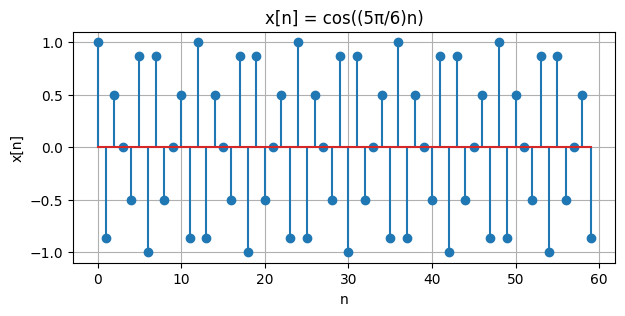

In [11]:

# TODO: razonamiento aquí (comentarios)
# Razonamiento: cada cierto intervalo de tiempo se repite la señal, ademas de que es un coseno y su frecuencia siempre es un numero racional de pi y su frecuencia fundamental es 12
# Verificación numérica (opcional):
n = np.arange(0, 60)
x = np.cos((5*np.pi/6)*n)
stem_plot(n, x, title="x[n] = cos((5π/6)n)")



### Ejercicio 3 — Transformaciones en una secuencia finita

Dada: **x[n] = {1,2,3,4}** para n = 0,1,2,3

Calcula y grafica:
- a) x[-n]
- b) x[n-2]
- c) x[n+1]
- d) x[-n+2]
- e) x[3-n]

**Nota:** Define claramente tu eje n para cada resultado (con padding si hace falta).


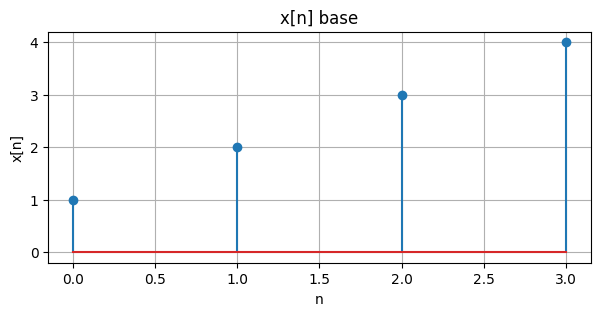

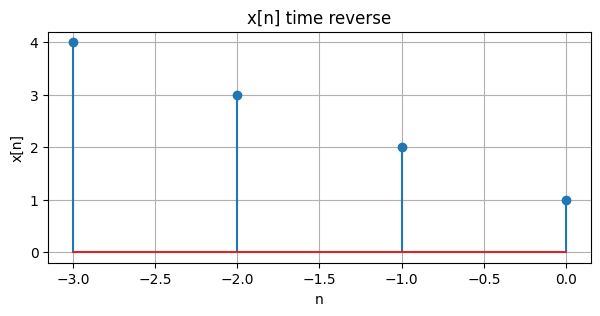

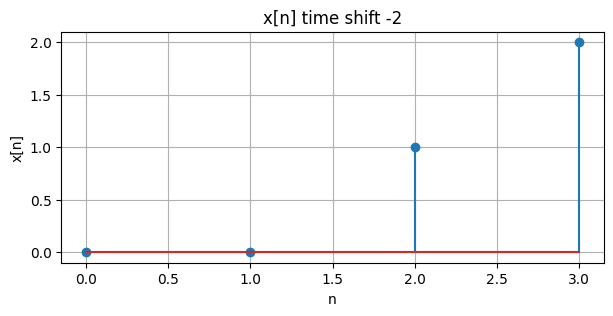

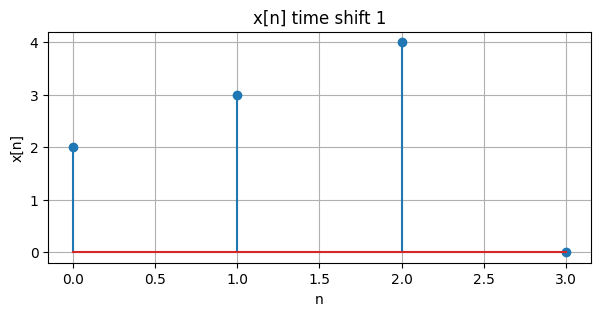

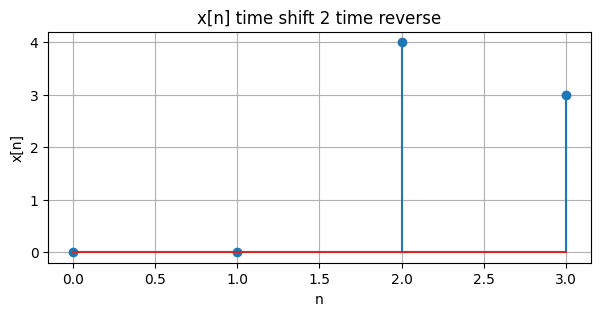

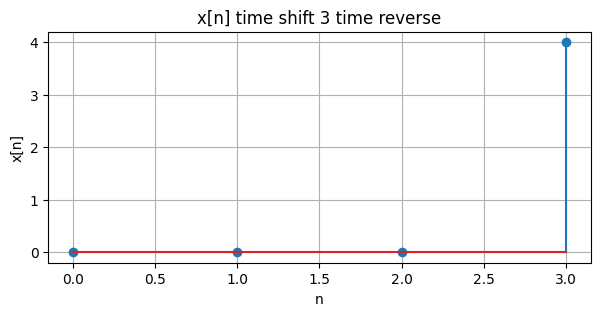

In [19]:
x = np.array([1,2,3,4], dtype=float)
n = np.arange(0, len(x))
n_rev = np.arange(-len(x)+1, 1)
n_rev2= np.array([0,1,2,3])
# TODO: usa tus funciones time_reverse / time_shift
#a
x_rev = time_reverse(x)
#b
x_delay2 = time_shift(x, -2)
#c
x_adv1 = time_shift(x, 1)
#d
x_adv2 = time_shift(x, 2)
x_adv2rev=time_reverse(x_adv2)
#e
x_adv3 = time_shift(x, 3)
x_adv3rev=time_reverse(x_adv3)
# Luego construye:
# x_minus_n_plus_2 = ???  (composición)
# x_3_minus_n = ???       (composición)

# TODO: define ejes n adecuados y grafica cada resultado.
stem_plot(n, x, title="x[n] base")
stem_plot(n_rev, x_rev, title="x[n] time reverse")
stem_plot(n, x_delay2, title="x[n] time shift -2")
stem_plot(n, x_adv1, title="x[n] time shift 1")
stem_plot(n_rev2, x_adv2rev, title="x[n] time shift 2 time reverse")
stem_plot(n_rev2, x_adv3rev, title="x[n] time shift 3 time reverse")
#Razonamiento: Basicamente hicimos operaciones basicas con señales y las hicimos en orden para evitar errores, (Primero desplazamientos y despues time reverse)

📌 Conecta con **Serie 1 #5–7** (x[-n], x[n±k], composiciones).


### Ejercicio 4 — Energía, media y RMS

Para x[n] = {2, -2, 2, -2} (n=0..3):

1) Calcula la **media**  
2) Calcula el **RMS**  
3) Interpreta: ¿media = 0 implica RMS = 0? (explica)

**TODO:** Implementa usando tus funciones `mean_value` y `rms`.


📌 Conecta con **Serie 1 #11** (media y RMS).

In [ ]:

x = np.array([2, -2, 2, -2], dtype=float)

# TODO
m = mean_value(x)
r = rms(x)
print("Media:", m)
print("RMS:", r)
#Razonamiento: al tomar valores negativos y ser por asi decirlo simetrico, este su promedio es 0 pero al utilizar RMS se elimina la parte negativa por lo que podemos calcular el promedio real de la señal

Media: 0.0
RMS: 2.0



### Ejercicio 5 — Energía (señal exponencial DT truncada)

Define una señal finita:
x[n] = (0.9)^n u[n]  para n = 0..30

1) Grafica x[n]  
2) Calcula la energía aproximada en ese intervalo (truncado)  
3) Explica qué pasaría si el intervalo fuera infinito (conceptual)

**TODO:** usa `energy(x)` y discute.


📌 Conecta con **Serie 1 #9** (energía de (0.9)^n u[n]).

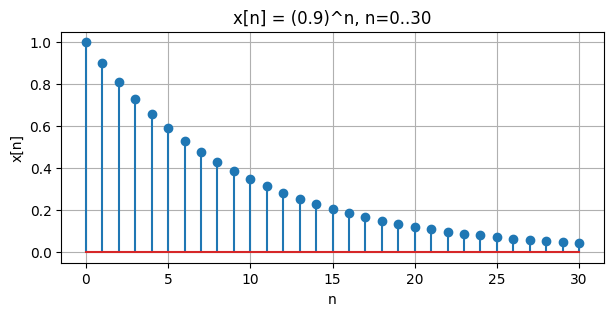

Energía (truncada 0..30): 5.255496956089839


In [ ]:

n = np.arange(0, 31)
x = (0.9**n)  # u[n]=1 para n>=0 en este rango

stem_plot(n, x, title="x[n] = (0.9)^n, n=0..30")

# TODO
E = energy(x)
print("Energía (truncada 0..30):", E)
#Razonamiento al truncar la funcion esta se vuelve una señal de energia por  lo tanto se puede calcular esta.


### Ejercicio 6 — Correlación (sin funciones mágicas)

x[n] = {1,2,1}  
y[n] = {1,0,-1}

1) Calcula la **autocorrelación** r_xx[k]  
2) Calcula la **correlación cruzada** r_xy[k]  
3) Grafica r_xx[k] y r_xy[k] con eje de lags k.

**TODO:** implementa `autocorr` y `crosscorr` usando loops e índices.


📌 Conecta con **Serie 1 #12** (autocorrelación y correlación cruzada).

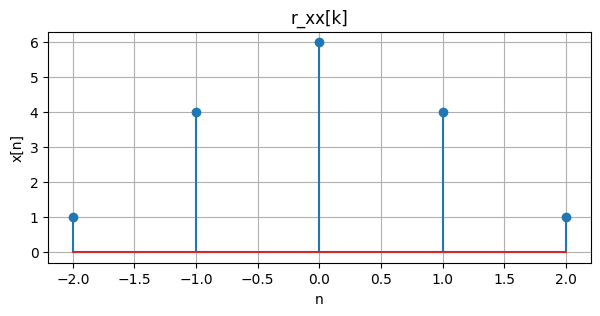

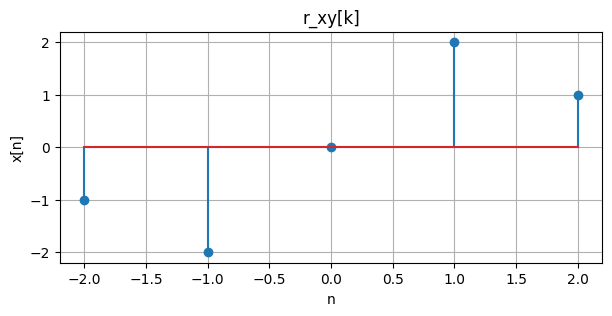

In [ ]:

x = np.array([1,2,1], dtype=float)
y = np.array([1,0,-1], dtype=float)

# TODO
k, rxx = autocorr(x)
stem_plot(k, rxx, title="r_xx[k]")

k, rxy = crosscorr(x, y)
stem_plot(k, rxy, title="r_xy[k]")



## 🔊 Sección Audio (extensión opcional)

**Idea:** Graba audio (con tu celular, Audacity, etc.), guarda un `.wav` y súbelo al notebook.

- En **Colab**: usa `files.upload()` (celda siguiente).
- En **Jupyter local**: coloca el `.wav` en la misma carpeta del notebook y pon el nombre en `wav_path`.

> Esta sección es para experimentar con **señales reales** usando las mismas operaciones DT.


In [ ]:

# === (Colab) Subir WAV (MISMO PATRÓN DEL EJEMPLO) ===
from google.colab import files
uploaded = files.upload()  # elige tu archivo .wav

# TODO: escribe EXACTAMENTE el nombre del archivo que subiste (tal como aparece arriba)
wav_path = "output_16k_mono.wav"

print("Usando wav_path =", wav_path)


In [ ]:

# === Cargar WAV (se mantiene simple y robusto) ===
# Intentamos soundfile primero; si no está, usamos scipy.io.wavfile.
fs = None
audio = None

audio_loaded = False

try:
    import soundfile as sf
    audio, fs = sf.read(wav_path, dtype="float32", always_2d=False)
    audio_loaded = True
except Exception as e:
    print("soundfile falló o no está instalado:", e)

if not audio_loaded:
    try:
        from scipy.io import wavfile
        fs, audio_int = wavfile.read(wav_path)

        # Si es estéreo, toma un canal (puedes cambiarlo)
        if hasattr(audio_int, "ndim") and audio_int.ndim > 1:
            audio_int = audio_int[:, 0]

        # Normaliza a float32 en [-1, 1] si viene en entero
        if np.issubdtype(audio_int.dtype, np.integer):
            max_val = np.iinfo(audio_int.dtype).max
            audio = audio_int.astype("float32") / max_val
        else:
            audio = audio_int.astype("float32")

        audio_loaded = True
    except Exception as e:
        print("No pude cargar el WAV con scipy tampoco:", e)

if audio_loaded:
    print("fs =", fs, "Hz")
    print("muestras =", len(audio))


In [ ]:

# === Visualización (muestra corta) ===
# Graficamos solo las primeras N muestras para que se vea tipo DT.
N = 500  # puedes cambiar
if audio is not None:
    n = np.arange(len(audio))
    stem_plot(n[:N], audio[:N], title=f"Primeras {N} muestras del audio")


In [ ]:

# === Experimentos sugeridos (TODO) ===
# 1) Invertir: usa time_reverse(audio_short) sobre una ventana corta (ej. primeras 2000 muestras)
# 2) Corrimiento: aplica time_shift(..., k=200) (retardo) o k=-200 (adelanto)
# 3) Energía: compara energy(x) antes/después (¿cambia? ¿por qué?)
# 4) Submuestreo manual: crea x_ds = audio[::M] (aquí SÍ se permite slicing por submuestreo)
#
# Nota: Para no hacer señales enormes, trabaja con una ventana:
# audio_w = audio[:4000]
#
# TODO: implementa aquí tus pruebas y gráficas



## 7) IA (requerido)

Para **al menos 3 ejercicios**, incluye:

1) Tu solución manual/código  
2) El prompt exacto que usaste con IA  
3) Una comparación breve: ¿en qué coincide y en qué no? ¿por qué?

> Objetivo: aprender a **verificar**, no a copiar.


# **PARA EL TIME SHIFT 1**

***Solucion manual***


```
def time_shift(x, k, pad_value=0.0):
    """Return x_shift[n] = x[n-k]. Positive k shifts RIGHT (delay)."""
    # TODO: implement with explicit padding
    x = np.asarray(x)
    N = len(x)
    # Creamos el arreglo de salida lleno con el pad_value por defecto
    x_shift = np.full(N, pad_value)
    
    # Recorremos cada posición 'n' de nuestro nuevo arreglo
    for n in range(N):
        # El valor en x_shift[n] debe ser x[n - k]
        # Pero solo si (n - k) es un índice válido dentro del arreglo original
        indice_original = n - k
        
        if 0 <= indice_original < N:
            x_shift[indice_original] = x[n]
            
    return x_shift
#Creo que aqui seria al reves
```


***Prompt IA***

no entiendo que es el pad_value

***En que coinciden***

Cuando metí ese prompt le pregunte a la IA de que servia y me comento que depende, para rellenar de lo que yo quiera la grafica en veez de ponerla con ceros.

# **PARA EL TIME SHIFT 2**

***Solucion manual***


```
def time_shift(x, k, pad_value=0.0):
    """Return x_shift[n] = x[n-k]. Positive k shifts RIGHT (delay)."""
    # TODO: implement with explicit padding
    x = np.asarray(x)
    N = len(x)
    # Creamos el arreglo de salida lleno con el pad_value por defecto
    x_shift = np.full(N, pad_value)
    
    # Recorremos cada posición 'n' de nuestro nuevo arreglo
    for n in range(N):
        # El valor en x_shift[n] debe ser x[n - k]
        # Pero solo si (n - k) es un índice válido dentro del arreglo original
        indice_original = n - k
        
        if 0 <= indice_original < N:
            x_shift[indice_original] = x[n]
            
    return x_shift
#Creo que aqui seria al reves
```


***Prompt IA***

Dame la definicion de esta funcion


```

def time_shift(x, k, pad_value=0.0):

    """Return x_shift[n] = x[n-k]. Positive k shifts RIGHT (delay)."""

    # TODO: implement with explicit padding

```


***En que coinciden***

Me dio un codigo muy similar al mio pero no tomo en cuenta el desplazamiento en el tiempo como lo hicimos en clase basicamente si  se atrasaba o adelantaba siempre empezaba en el eje 0 y yo si lo movi del eje 0.


```
#Linea sin correcion
x_shift[n] = x[indice_original]

#Linea corregida
x_shift[indice_original] = x[n]

```



# **PARA la funcio de ENERGY**

***Solucion manual***


```
def energy(x):
    """E = sum |x[n]|^2 for the available samples."""
    # TODO
    x = np.asarray(x)
    suma_energia = 0.0
    
    # Recorremos cada muestra de la señal
    for muestra in x:
        # Elevamos al cuadrado (el valor absoluto es implícito al elevar al cuadrado)
        # pero usamos abs() por si la señal tuviera números complejos
        suma_energia += abs(muestra)**2
        #Aqui la ia agrego lo del valor absoluto
    return suma_energia
```


***Prompt IA***

Dame la definicion de la funcion


```

def energy(x):
    """E = sum |x[n]|^2 for the available samples."""
    # TODO

```



***En que coinciden***

Cuando metí ese prompt la ia me dio una funcion similar a la mia pero con valor absoluto y era para evitar utilizar la parte compleja de la funcion.






## Checklist antes de entregar

- [ ] Tu nombre/matrícula/grupo están completos  
- [ ] Todas las celdas corren sin error  
- [ ] Hay gráficas claras para cada ejercicio  
- [ ] No usaste funciones prohibidas  
- [ ] Incluiste la sección de IA (3 ejercicios mínimo)
